In [346]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# *Загрузка и пробное прочтение данных*

In [347]:
df_airlines = pd.read_csv('airlines.csv')
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [348]:
df_airports = pd.read_csv('airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [359]:
df_flights = pd.read_csv('flights.csv', dtype = str)
df_flights.head()

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type object

## 1) Как и предполагается в описании задания, **в понедельник в целом загруженность выше**, о чем данные в круговой диаграмме свидетельствуют. В субботу количество задержек в среднем меньше. Диаграмма приложена ниже.

(-1.1631607061083882,
 1.1940896701004682,
 -1.196334729346114,
 1.143585680186934)

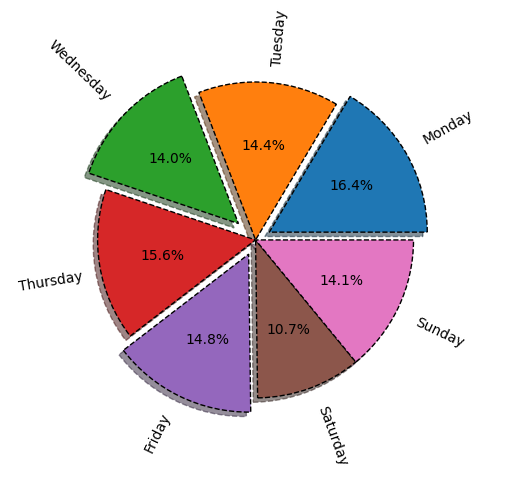

In [351]:
df_flights.DEPARTURE_DELAY = df_flights.DEPARTURE_DELAY.astype(float)
df_flights["DATE"] = pd.to_datetime(df_flights[['YEAR', 'MONTH', 'DAY']]) ## добавили столбец с датой
df_flights.DAY_OF_WEEK = df_flights.DAY_OF_WEEK.astype(int)
df_flight = df_flights.loc[(df_flights[['DEPARTURE_DELAY']]>0).any(axis=1)] ## положительное время задержки рейсов
df_week = df_flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].sum()
list_delays = df_week.to_list()
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
explode = (0.1, 0, 0.15, 0, 0.1, 0, 0)
fig, ax = plt.subplots()
ax.pie(list_delays, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

## 2) Вероятно, задержки могут быть в целом из-за **достаточно сильной загруженности той или иной авиакомпании**. Приведен список авиакомпанией со средней загруженностью.

In [363]:
df_air = df_flights.loc[:,['DEPARTURE_DELAY', 'IATA_CODE']]
df_tmp = df_air.merge(df_airlines, on='IATA_CODE')
tmp1 = df_tmp.groupby('AIRLINE')['AIRLINE'].size()
tmp2 = df_tmp.groupby('AIRLINE')['DEPARTURE_DELAY'].sum()
a1 = tmp1.to_list()
a2 = tmp2.to_list()
keys = tmp1.keys()
d = {'NUMBER_OF_FLIGHTS':a1, 'DEPARTURE_DELAY':a2}
dframe = pd.DataFrame(d, keys)
dframe["AVERAGE_DELAY"] = dframe["DEPARTURE_DELAY"]/dframe["NUMBER_OF_FLIGHTS"]
dframe.sort_values(by=['AVERAGE_DELAY'], ascending=False).loc[:, "AVERAGE_DELAY"]

AIRLINE
Frontier Airlines Inc.          44.540767
Spirit Air Lines                41.924149
Atlantic Southeast Airlines     40.840515
American Eagle Airlines Inc.    40.163999
Skywest Airlines Inc.           39.203279
JetBlue Airways                 37.617121
American Airlines Inc.          34.370397
United Air Lines Inc.           32.602183
Virgin America                  30.285983
Delta Air Lines Inc.            29.687442
US Airways Inc.                 28.500615
Southwest Airlines Co.          26.952377
Alaska Airlines Inc.            26.045976
Hawaiian Airlines Inc.          16.844039
Name: AVERAGE_DELAY, dtype: float64

## 3) По всей видимости, **в указанный диапазон времени восток США был много раз подвержен непогоде**. Несмотря на тектонические сдвиги, вызывающие землетрясения на западе США, время задержки авиарейсов на востоке остается больше (расчет по вылетам). Статьи действительно пишут о периодичности ливневых шквалов и гроз на востоке США.

In [263]:
avg_longitude = -100.0 ## условное разделение на запад и восток
tmp2 = df_flights.loc[:, ["ORIGIN_AIRPORT", "DEPARTURE_DELAY"]]
tab_airport = tmp2.merge(df_airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
tab_airport.LONGITUDE = tab_airport.LONGITUDE.astype(float)
tab1 = tab_airport.loc[tab_airport['LONGITUDE'] < avg_longitude]
tab2 = tab_airport.loc[tab_airport['LONGITUDE'] >= avg_longitude]
val1 = tab1.DEPARTURE_DELAY.sum()/tab1.shape[0]
val2 = tab2.DEPARTURE_DELAY.sum()/tab2.shape[0]
print("WESTERN PART: DEPARTURE DELAY ~ {0}, EASTERN PART: DEPARTURE DELAY ~ {1}".format(val1, val2))

WESTERN PART: DEPARTURE DELAY ~ 30.128205620024936, EASTERN PART: DEPARTURE DELAY ~ 34.48085872748064


## 4) Естественно было предположить, *что во время семейных праздников необходимо последуют задержки авиарейсов*. Но оказывается, такая **тенденция наблюдается только в Рождество и в Новый год**, причем заметны задержки разительно. В Пасху и в День Благодарения среднее время задержек ниже годового среднего.

<Axes: xlabel='EVENTS'>

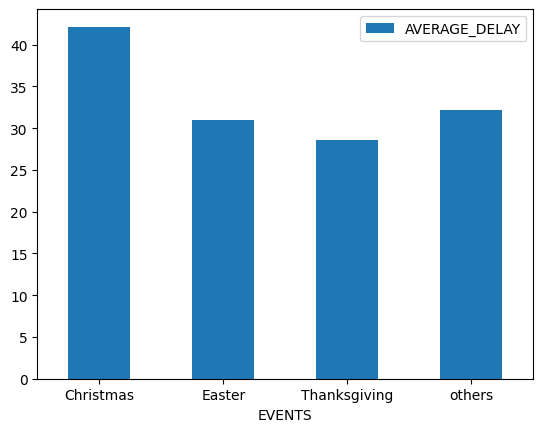

In [344]:
df_date = df_flights.loc[:, ['DATE', 'DEPARTURE_DELAY']]
bool_1 = (df_date.DATE >= pd.to_datetime('2015-01-01'))&(df_date.DATE <= pd.to_datetime('2015-01-07'))|(df_date.DATE >= pd.to_datetime('2015-12-23'))&(df_date.DATE <= pd.to_datetime('2015-12-31'))
bool_2 =  (df_date.DATE >= pd.to_datetime('2015-04-01'))&(df_date.DATE <= pd.to_datetime('2015-04-12'))
bool_3 = (df_date.DATE >= pd.to_datetime('2015-11-20'))&(df_date.DATE <= pd.to_datetime('2015-11-30'))
df_date_christmas = df_date.loc[bool_1]
df_date_easter = df_date.loc[bool_2]
df_date_thanksgiving = df_date.loc[bool_3]
df_date_others = df_date.loc[~(bool_1|bool_2|bool_3)]
delay_christmas = df_date_christmas.DEPARTURE_DELAY.sum()/df_date_christmas.shape[0]
delay_easter = df_date_easter.DEPARTURE_DELAY.sum()/df_date_easter.shape[0]
delay_thanksgiving = df_date_thanksgiving.DEPARTURE_DELAY.sum()/df_date_thanksgiving.shape[0]
delay_others = df_date_others.DEPARTURE_DELAY.sum()/df_date_others.shape[0]
x_ = {'EVENTS': ['Christmas', 'Easter', 'Thanksgiving', 'others'], 'AVERAGE_DELAY': [delay_christmas, delay_easter, delay_thanksgiving, delay_others]}
y = pd.DataFrame(data = x_)
y.plot.bar(x='EVENTS', y='AVERAGE_DELAY', rot=0)

## 5) Задержки авиарейсов естественно зависят от времени суток. **Предпочтением для полетов пользуется вечер, и со временем, к утру интенсивность немного снижается**. Меньше людей желают вставать ни свет ни заря для отправления в дорогу.

<Axes: xlabel='DAY_TIME'>

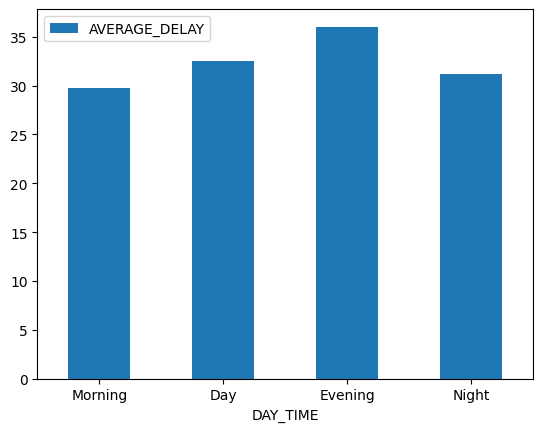

In [345]:
df_flights.SCHEDULED_DEPARTURE = df_flights.SCHEDULED_DEPARTURE.astype(int)
bool1 = (df_flights.SCHEDULED_DEPARTURE >= 0)&(df_flights.SCHEDULED_DEPARTURE < 600)
bool2 = (df_flights.SCHEDULED_DEPARTURE >= 600)&(df_flights.SCHEDULED_DEPARTURE < 1200)
bool3 = (df_flights.SCHEDULED_DEPARTURE >= 1200)&(df_flights.SCHEDULED_DEPARTURE < 1800)
bool4 = (df_flights.SCHEDULED_DEPARTURE >= 1800)&(df_flights.SCHEDULED_DEPARTURE <= 2359)
morning = df_flights.loc[bool2].DEPARTURE_DELAY.mean()
day = df_flights.loc[bool3].DEPARTURE_DELAY.mean()
evening = df_flights.loc[bool4].DEPARTURE_DELAY.mean()
night = df_flights.loc[bool1].DEPARTURE_DELAY.mean()
z_ = {'DAY_TIME': ['Morning', 'Day', 'Evening', 'Night'], 'AVERAGE_DELAY': [morning, day, evening, night]}
z = pd.DataFrame(data = z_)
z.plot.bar(x='DAY_TIME', y='AVERAGE_DELAY', rot=0)